In [19]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
# You have to use GPU to read overall dataset. (For this use any cloud service else run below cell to read part of the data which run on local system)

#min_id_select = 20
#max_id_select = 45
#filters=[[('stock_id', '>=', min_id_select), ('stock_id', '<', max_id_select)]]

#base_path = "/kaggle/input/optiver-realized-volatility-prediction/"
#df_book_1 = pd.read_parquet(base_path+'book_train.parquet',engine='pyarrow')
#df_trade_1 = pd.read_parquet(base_path+'trade_train.parquet',engine='pyarrow')
#train = pd.read_csv("../input/optiver-realized-volatility-prediction/train.csv")

In [14]:
df_book = pd.read_parquet("/kaggle/input/optiver-realized-volatility-prediction/book_train.parquet/stock_id=0/c439ef22282f412ba39e9137a3fdabac.parquet")
df_trade = pd.read_parquet("/kaggle/input/optiver-realized-volatility-prediction/trade_train.parquet/stock_id=0/ef805fd82ff54fadb363094e3b122ab9.parquet")

In [3]:
print(f"Number of Rows : ",df_book.shape[0])
print(f"Number of Columns : ",df_book.shape[1])
df_book.head()

Number of Rows :  917553
Number of Columns :  11


,time_id,seconds_in_bucket,bid_price1,ask_price1,bid_price2,ask_price2,bid_size1,ask_size1,bid_size2,ask_size2,stock_id
0,5,0,1.001422,1.002301,1.00137,1.002353,3,226,2,100,0
1,5,1,1.001422,1.002301,1.00137,1.002353,3,100,2,100,0
2,5,5,1.001422,1.002301,1.00137,1.002405,3,100,2,100,0
3,5,6,1.001422,1.002301,1.00137,1.002405,3,126,2,100,0
4,5,7,1.001422,1.002301,1.00137,1.002405,3,126,2,100,0


In [4]:
print(f"Number of Rows : ",df_trade.shape[0])
print(f"Number of Columns : ",df_trade.shape[1])
df_trade.head()

Number of Rows :  123443
Number of Columns :  6


,time_id,seconds_in_bucket,price,size,order_count,stock_id
0,5,21,1.002301,326,12,0
1,5,46,1.002778,128,4,0
2,5,50,1.002818,55,1,0
3,5,57,1.003155,121,5,0
4,5,68,1.003646,4,1,0


In [5]:
df_book.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 917553 entries, 0 to 917552
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   time_id            917553 non-null  int16  
 1   seconds_in_bucket  917553 non-null  int16  
 2   bid_price1         917553 non-null  float32
 3   ask_price1         917553 non-null  float32
 4   bid_price2         917553 non-null  float32
 5   ask_price2         917553 non-null  float32
 6   bid_size1          917553 non-null  int32  
 7   ask_size1          917553 non-null  int32  
 8   bid_size2          917553 non-null  int32  
 9   ask_size2          917553 non-null  int32  
 10  stock_id           917553 non-null  int32  
dtypes: float32(4), int16(2), int32(5)
memory usage: 35.0 MB


In [6]:
df_trade.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123443 entries, 0 to 123442
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   time_id            123443 non-null  int16  
 1   seconds_in_bucket  123443 non-null  int16  
 2   price              123443 non-null  float32
 3   size               123443 non-null  int32  
 4   order_count        123443 non-null  int16  
 5   stock_id           123443 non-null  int32  
dtypes: float32(1), int16(3), int32(2)
memory usage: 2.1 MB


<AxesSubplot:xlabel='stock_id', ylabel='order_count'>

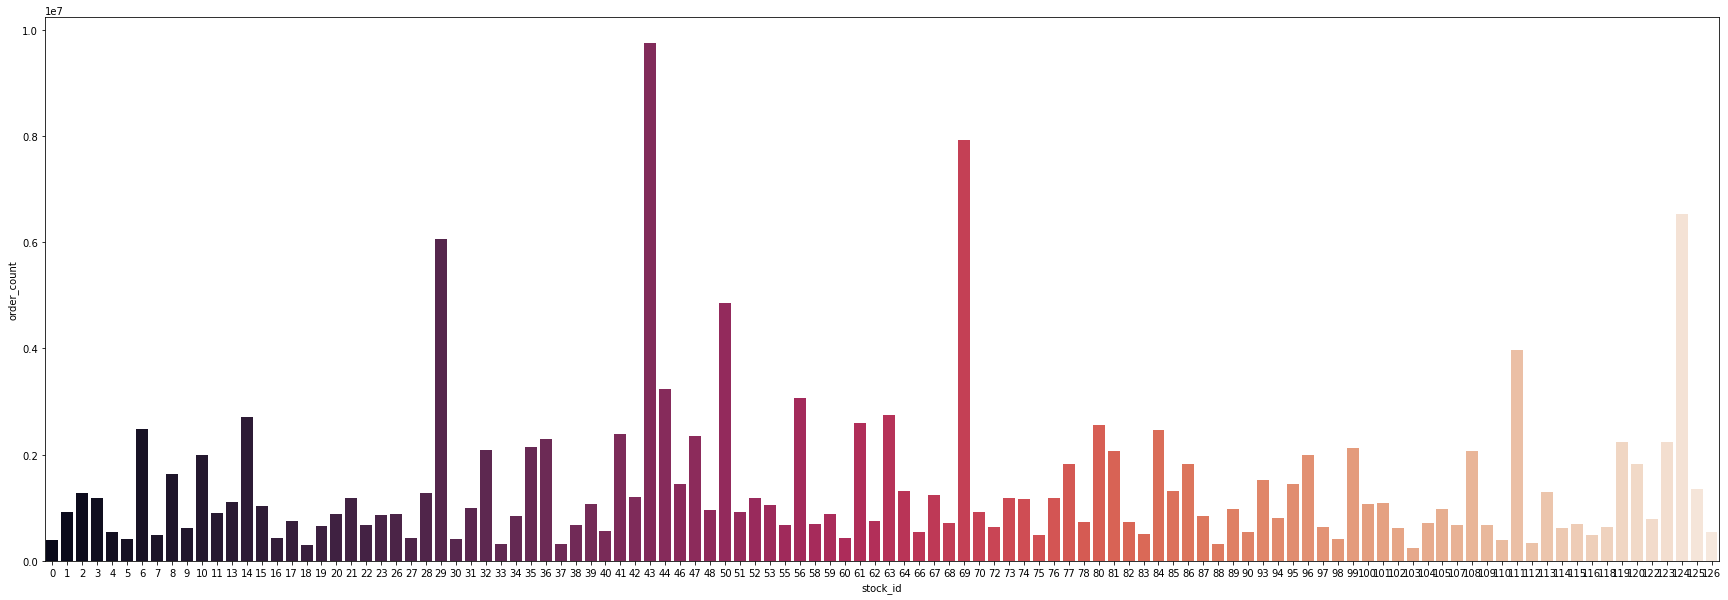

In [44]:
group_order_count = df_trade.groupby(by="stock_id").agg({"order_count": 'sum'}).reset_index().sort_values(by='order_count', ascending=False)

plt.figure(figsize=(30,10))
sns.barplot(x="stock_id", y="order_count", data=group_order_count,palette='rocket')

In [42]:
group_order_count.head()

,stock_id,order_count
40,43,9748125.0
61,69,7931692.0
109,124,6530236.0
26,29,6064886.0
45,50,4852831.0


In [43]:
group_order_count.tail()

,stock_id,order_count
34,37,326404.0
78,88,320119.0
30,33,312289.0
17,18,305150.0
91,103,243303.0


<AxesSubplot:xlabel='stock_id', ylabel='size'>

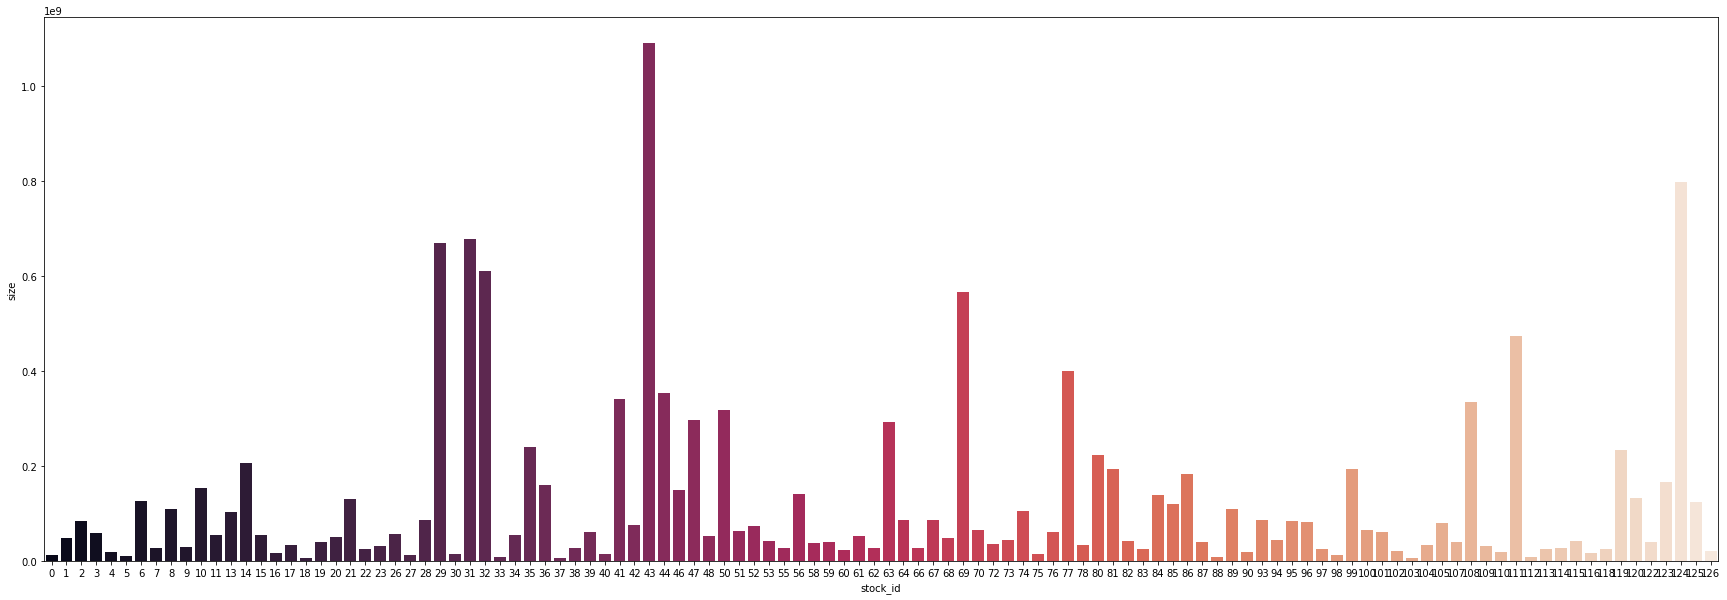

In [49]:
group_size = df_trade.groupby(by="stock_id").agg({"size": 'sum'}).reset_index().sort_values(by='size', ascending=False)

plt.figure(figsize=(30,10))
sns.barplot(x="stock_id", y="size", data=group_size,palette='rocket')

In [50]:
group_size.head()

,stock_id,size
40,43,1090864383
109,124,798011626
28,31,678140203
26,29,669856104
29,32,610598174


In [51]:
group_size.tail()

,stock_id,size
99,112,8097364
30,33,7241364
17,18,7091096
91,103,6482922
34,37,6015439


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

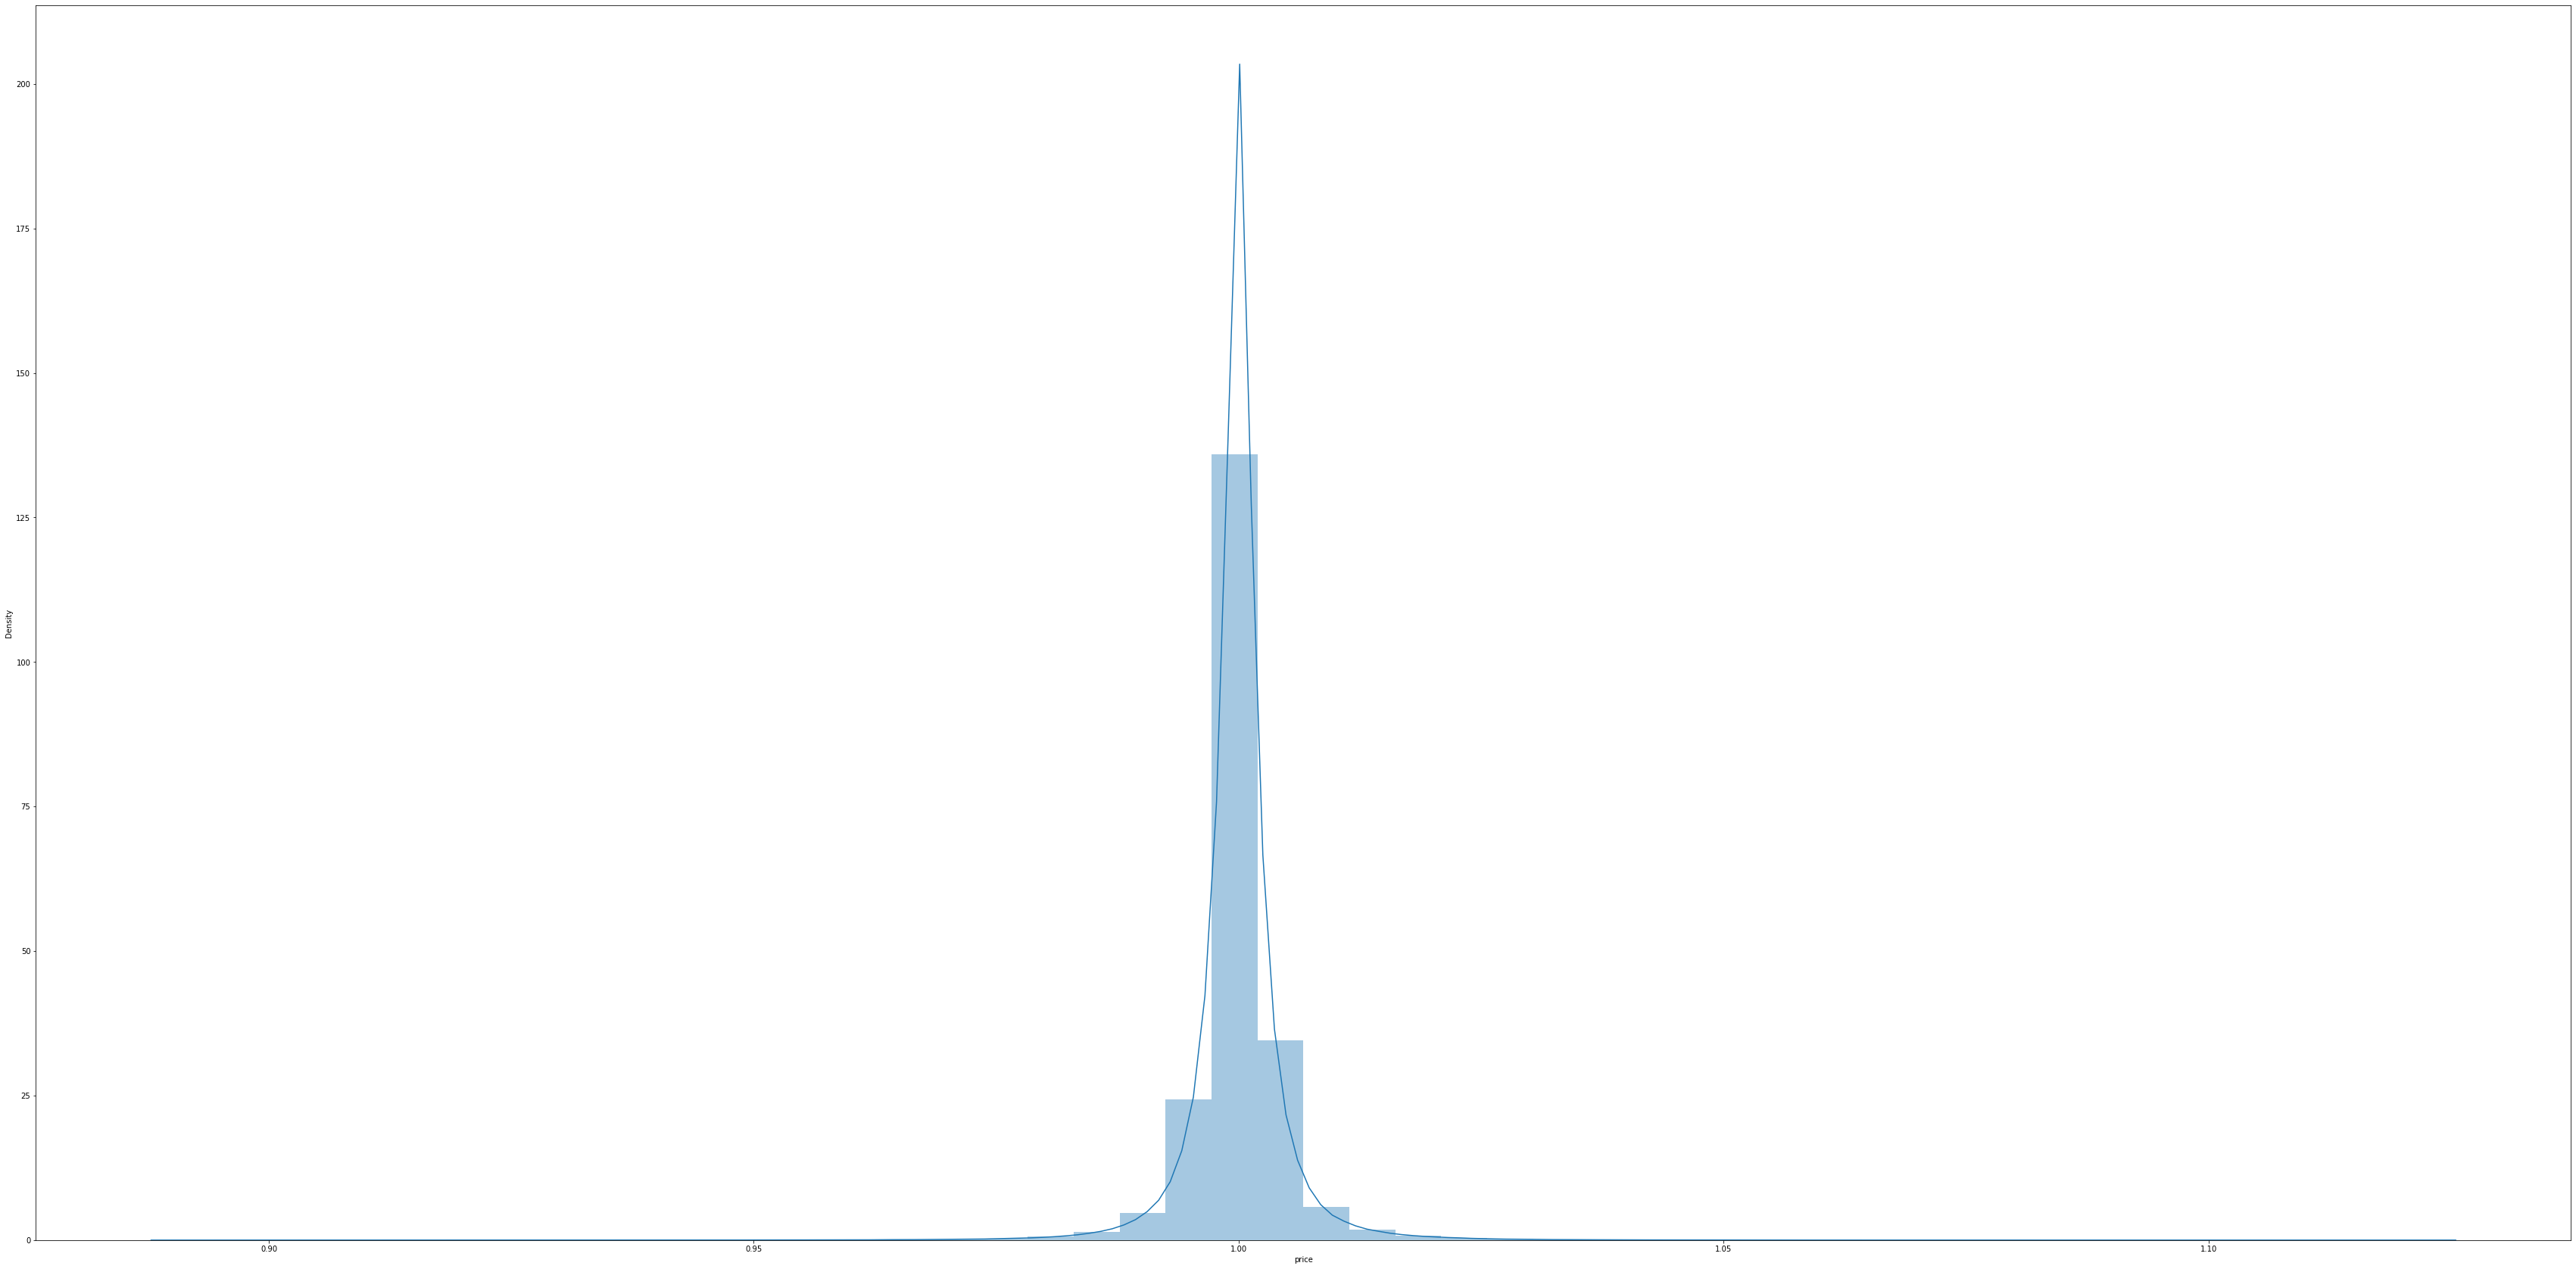

In [56]:
plt.figure(figsize=(60,30))
sns.distplot(df_trade['price'])

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='size', ylabel='Density'>

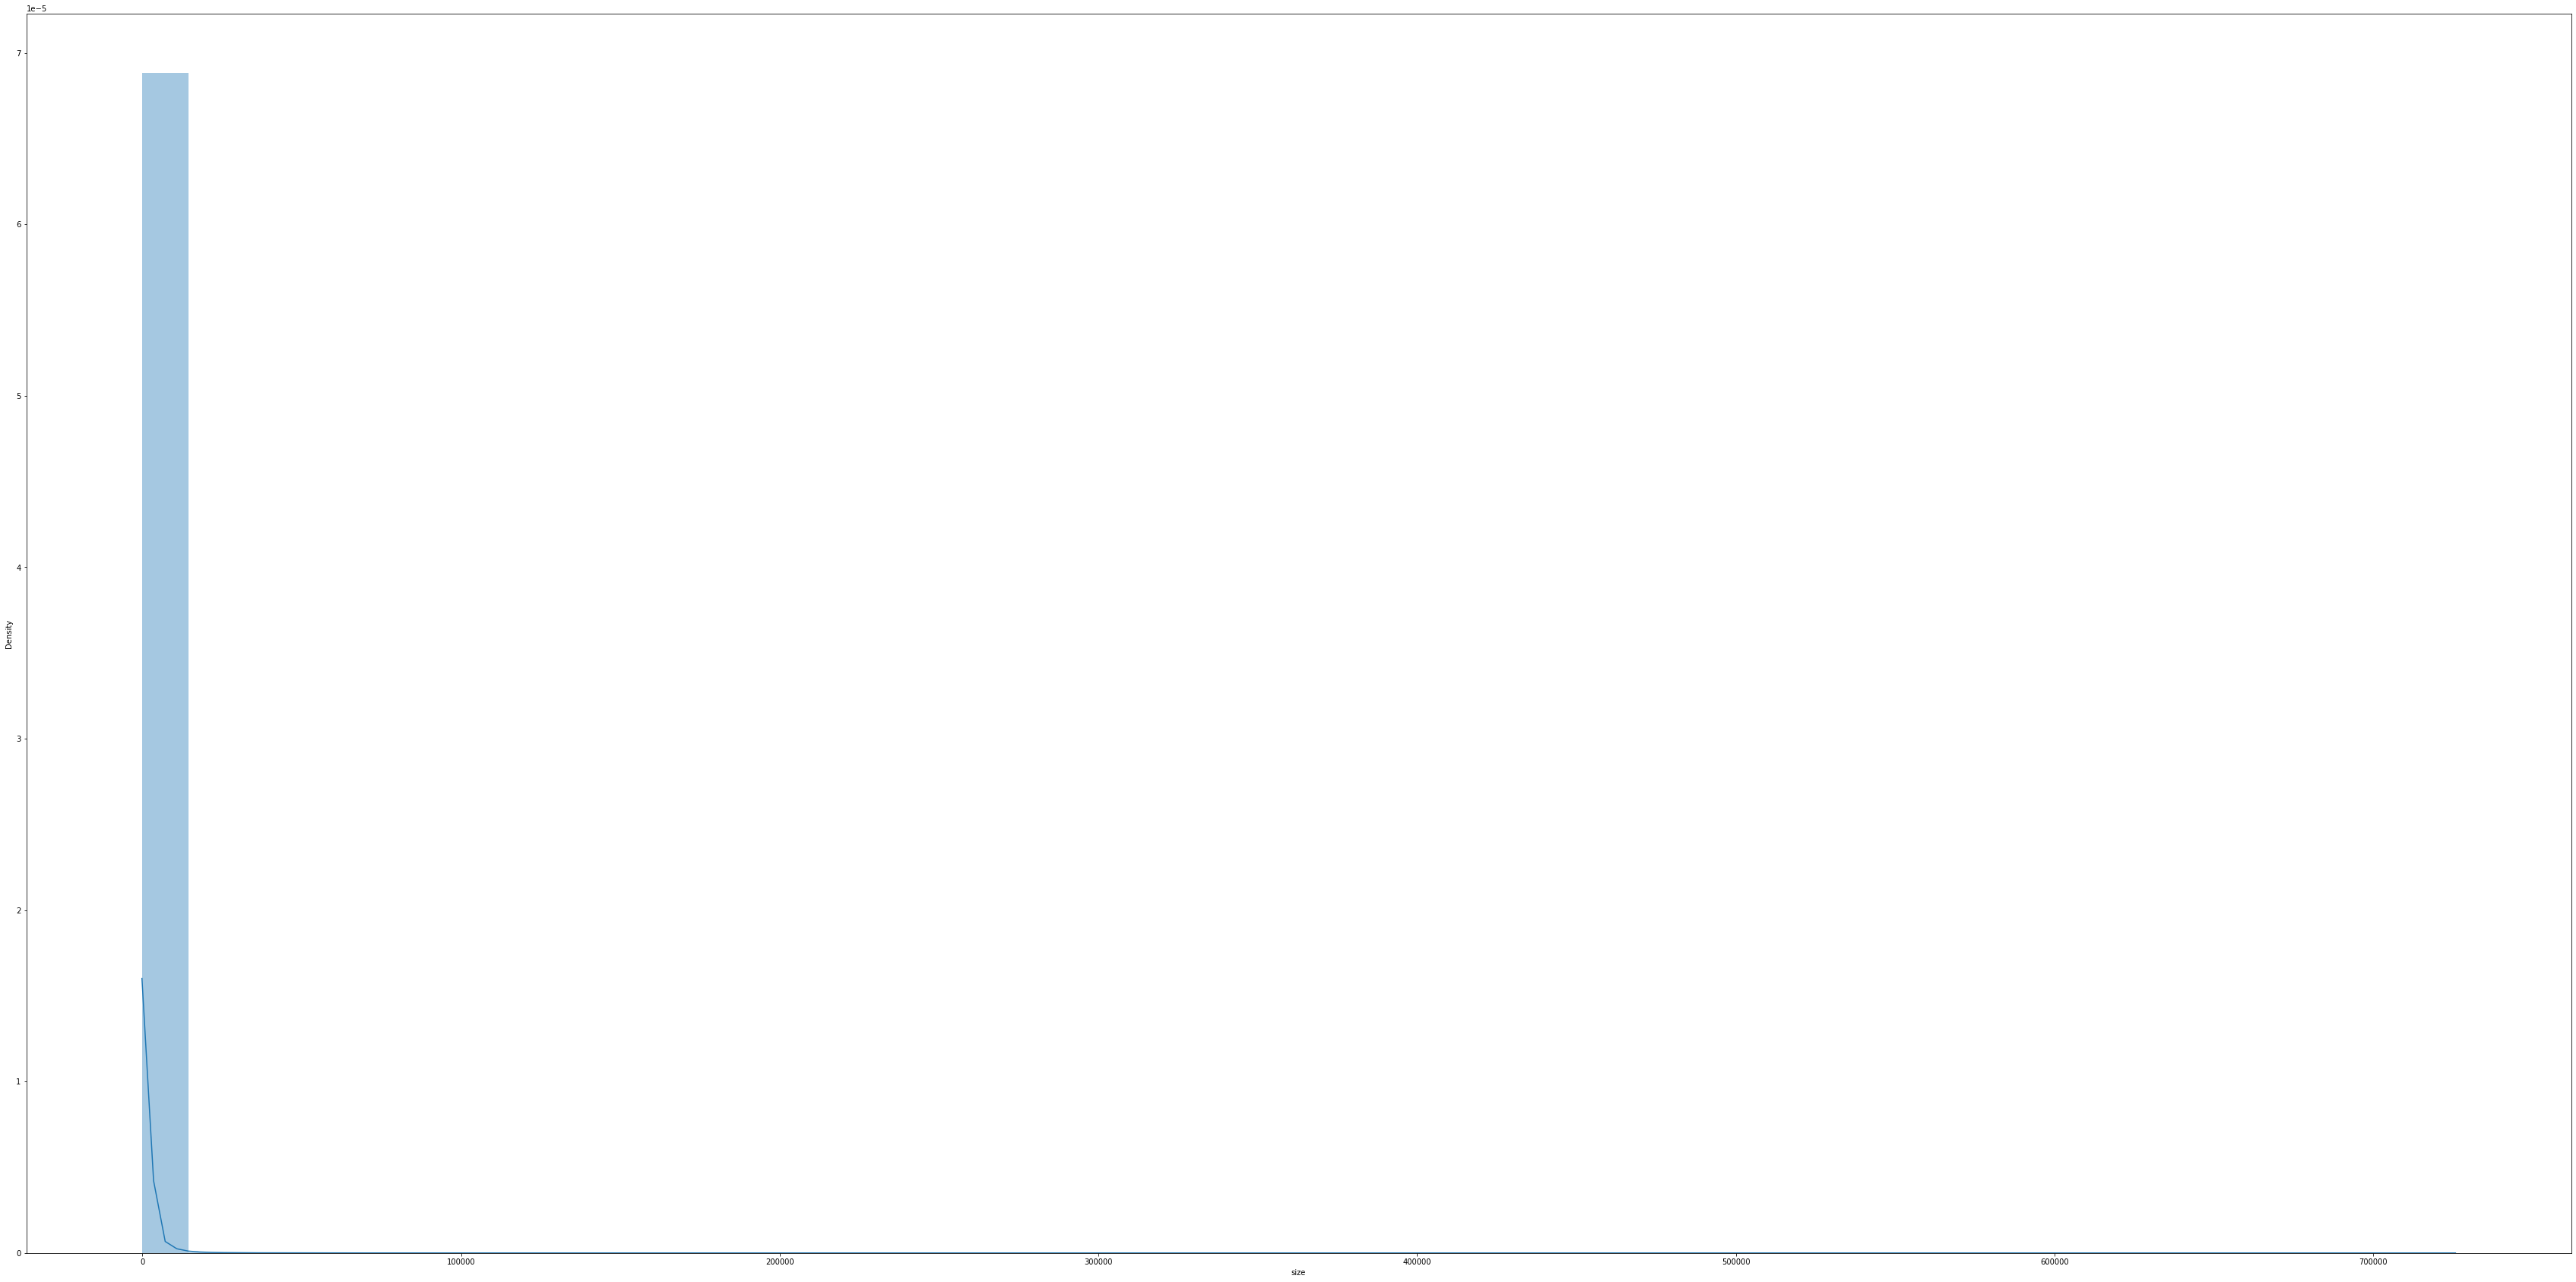

In [57]:
plt.figure(figsize=(60,30))
sns.distplot(df_trade['size'])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='seconds_in_bucket', ylabel='bid_price1'>

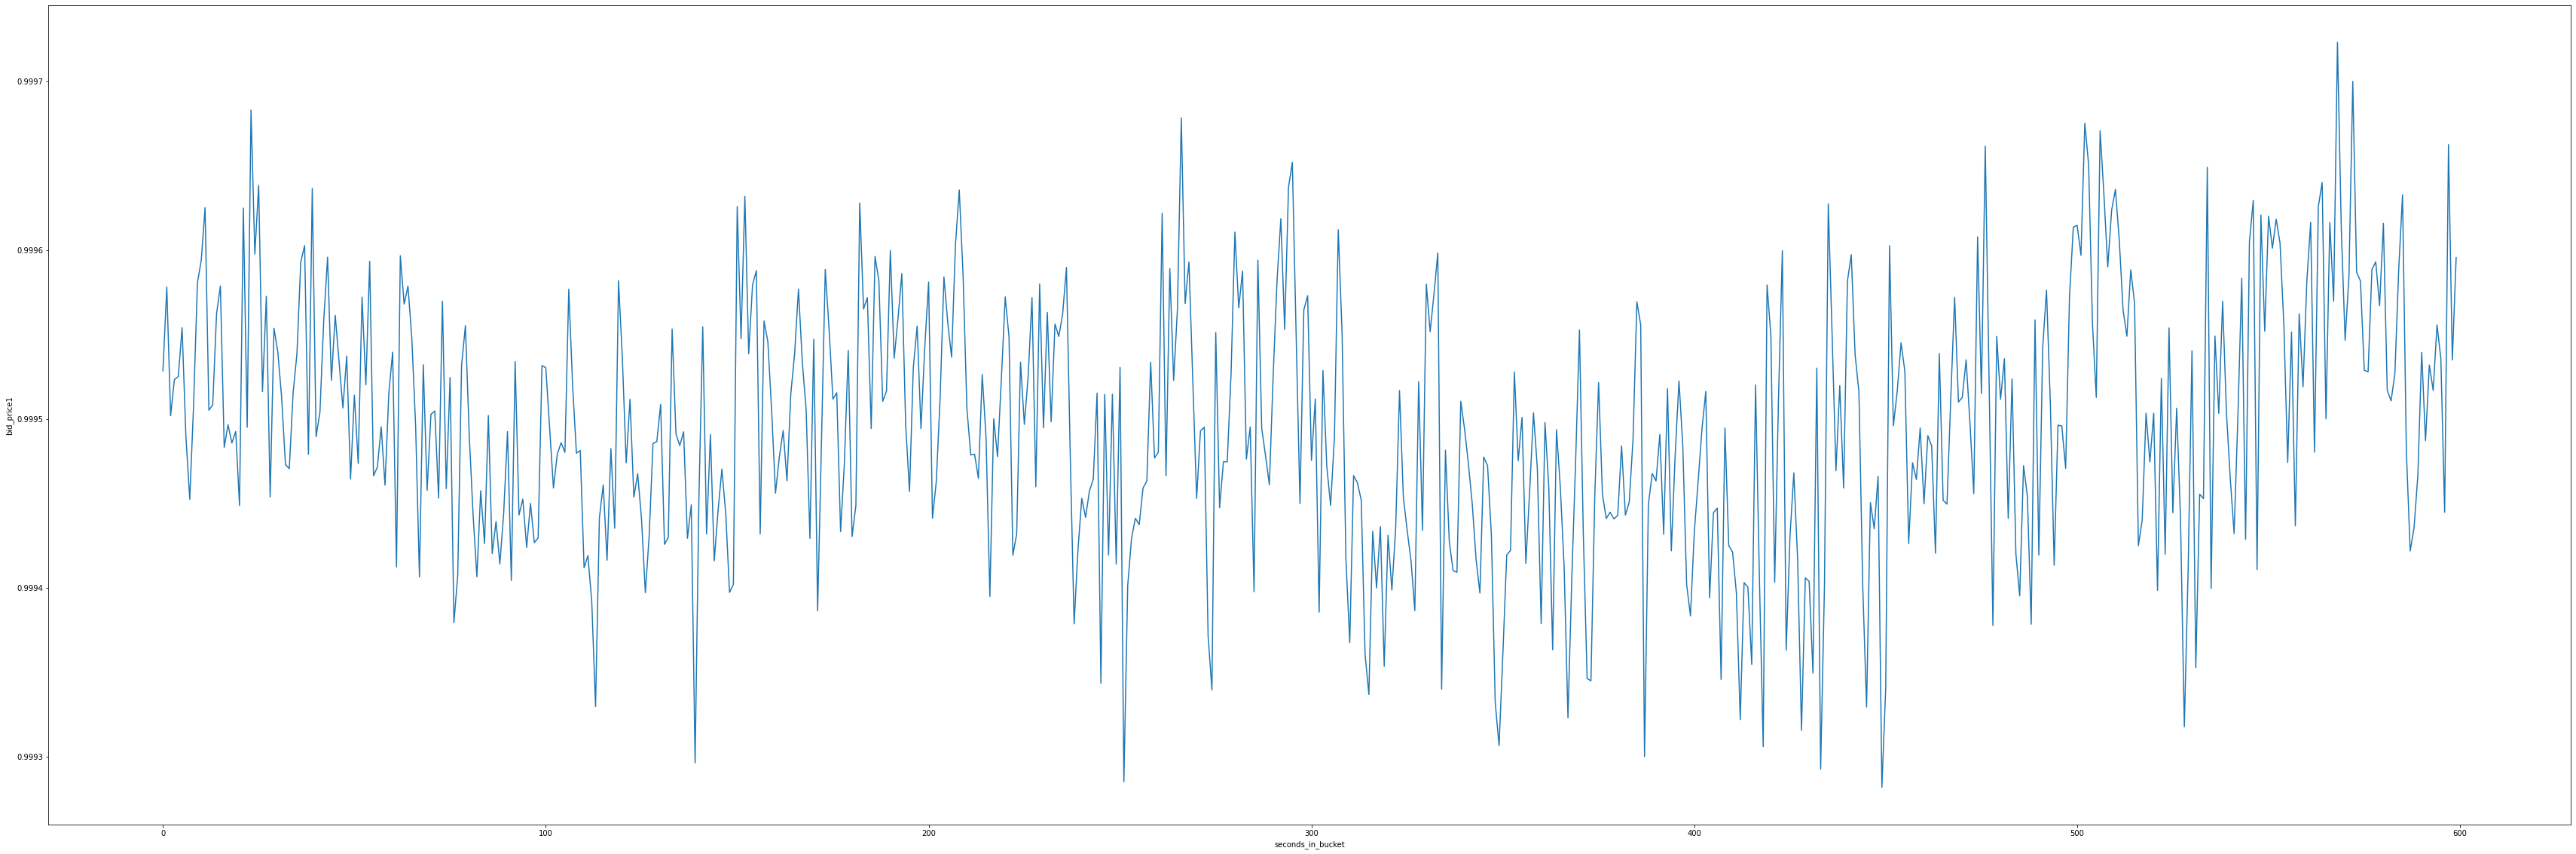

In [14]:
plt.figure(figsize=(60,20))
sns.lineplot(df_book['seconds_in_bucket'],df_book['bid_price1'],err_style=None)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='seconds_in_bucket', ylabel='bid_price2'>

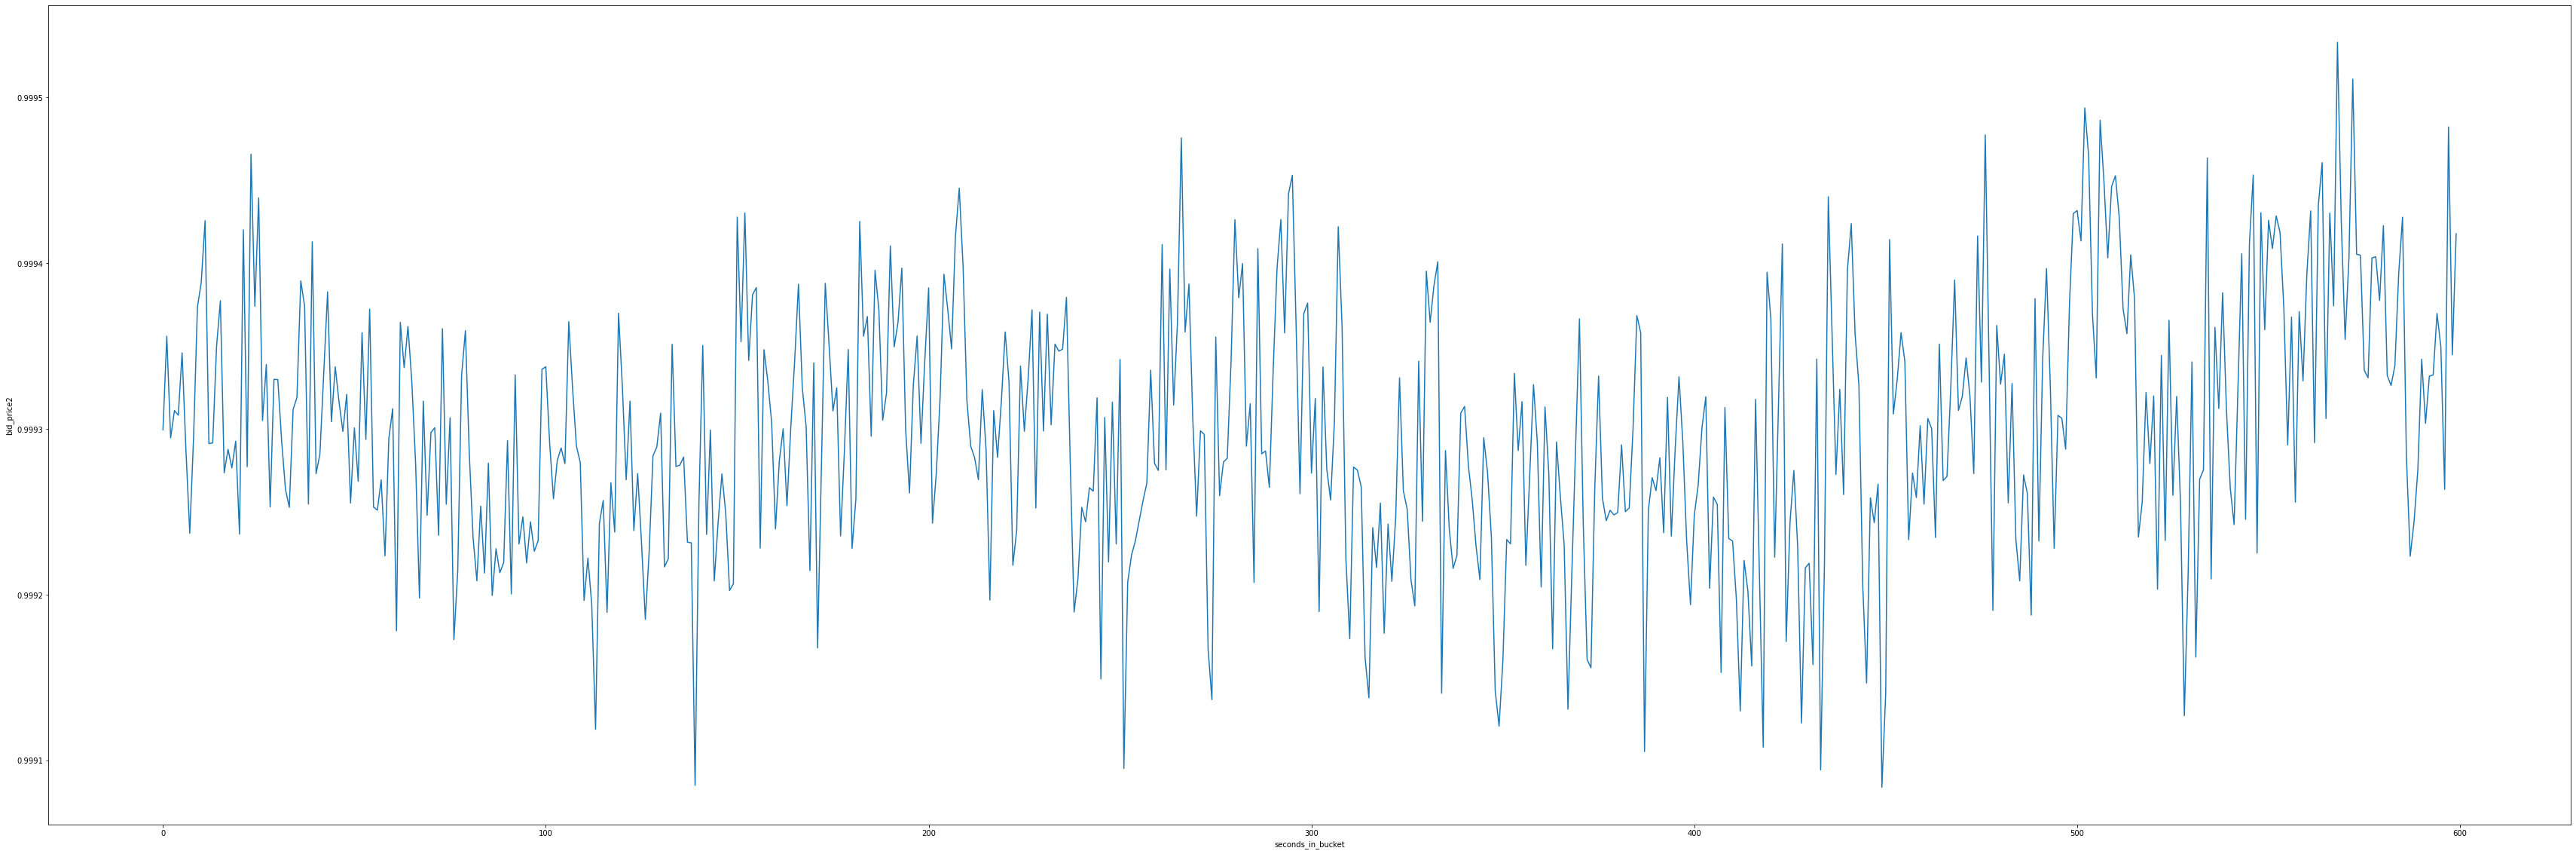

In [15]:
plt.figure(figsize=(60,20))
sns.lineplot(df_book['seconds_in_bucket'],df_book['bid_price2'],err_style=None)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='seconds_in_bucket', ylabel='ask_price1'>

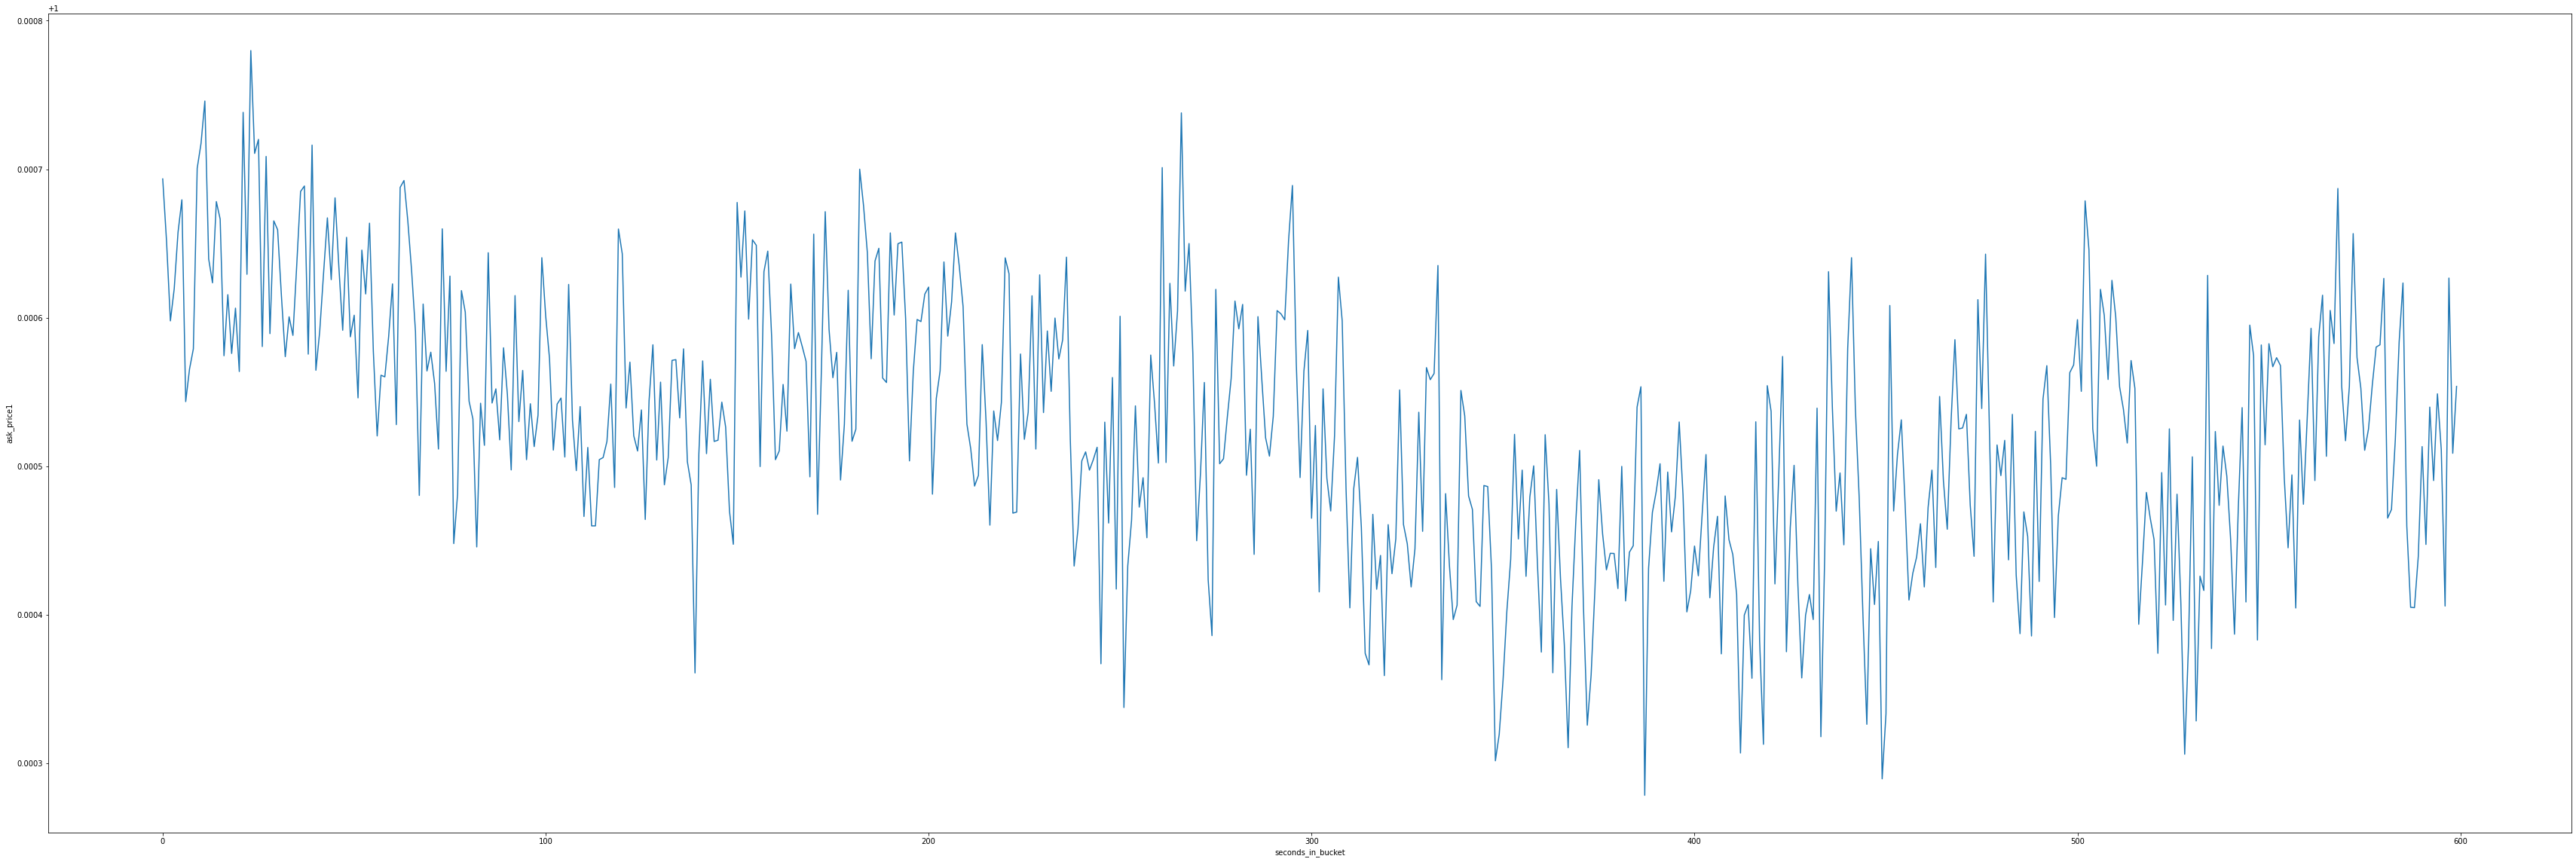

In [17]:
plt.figure(figsize=(60,20))
sns.lineplot(df_book['seconds_in_bucket'],df_book['ask_price1'],err_style=None)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='seconds_in_bucket', ylabel='ask_price2'>

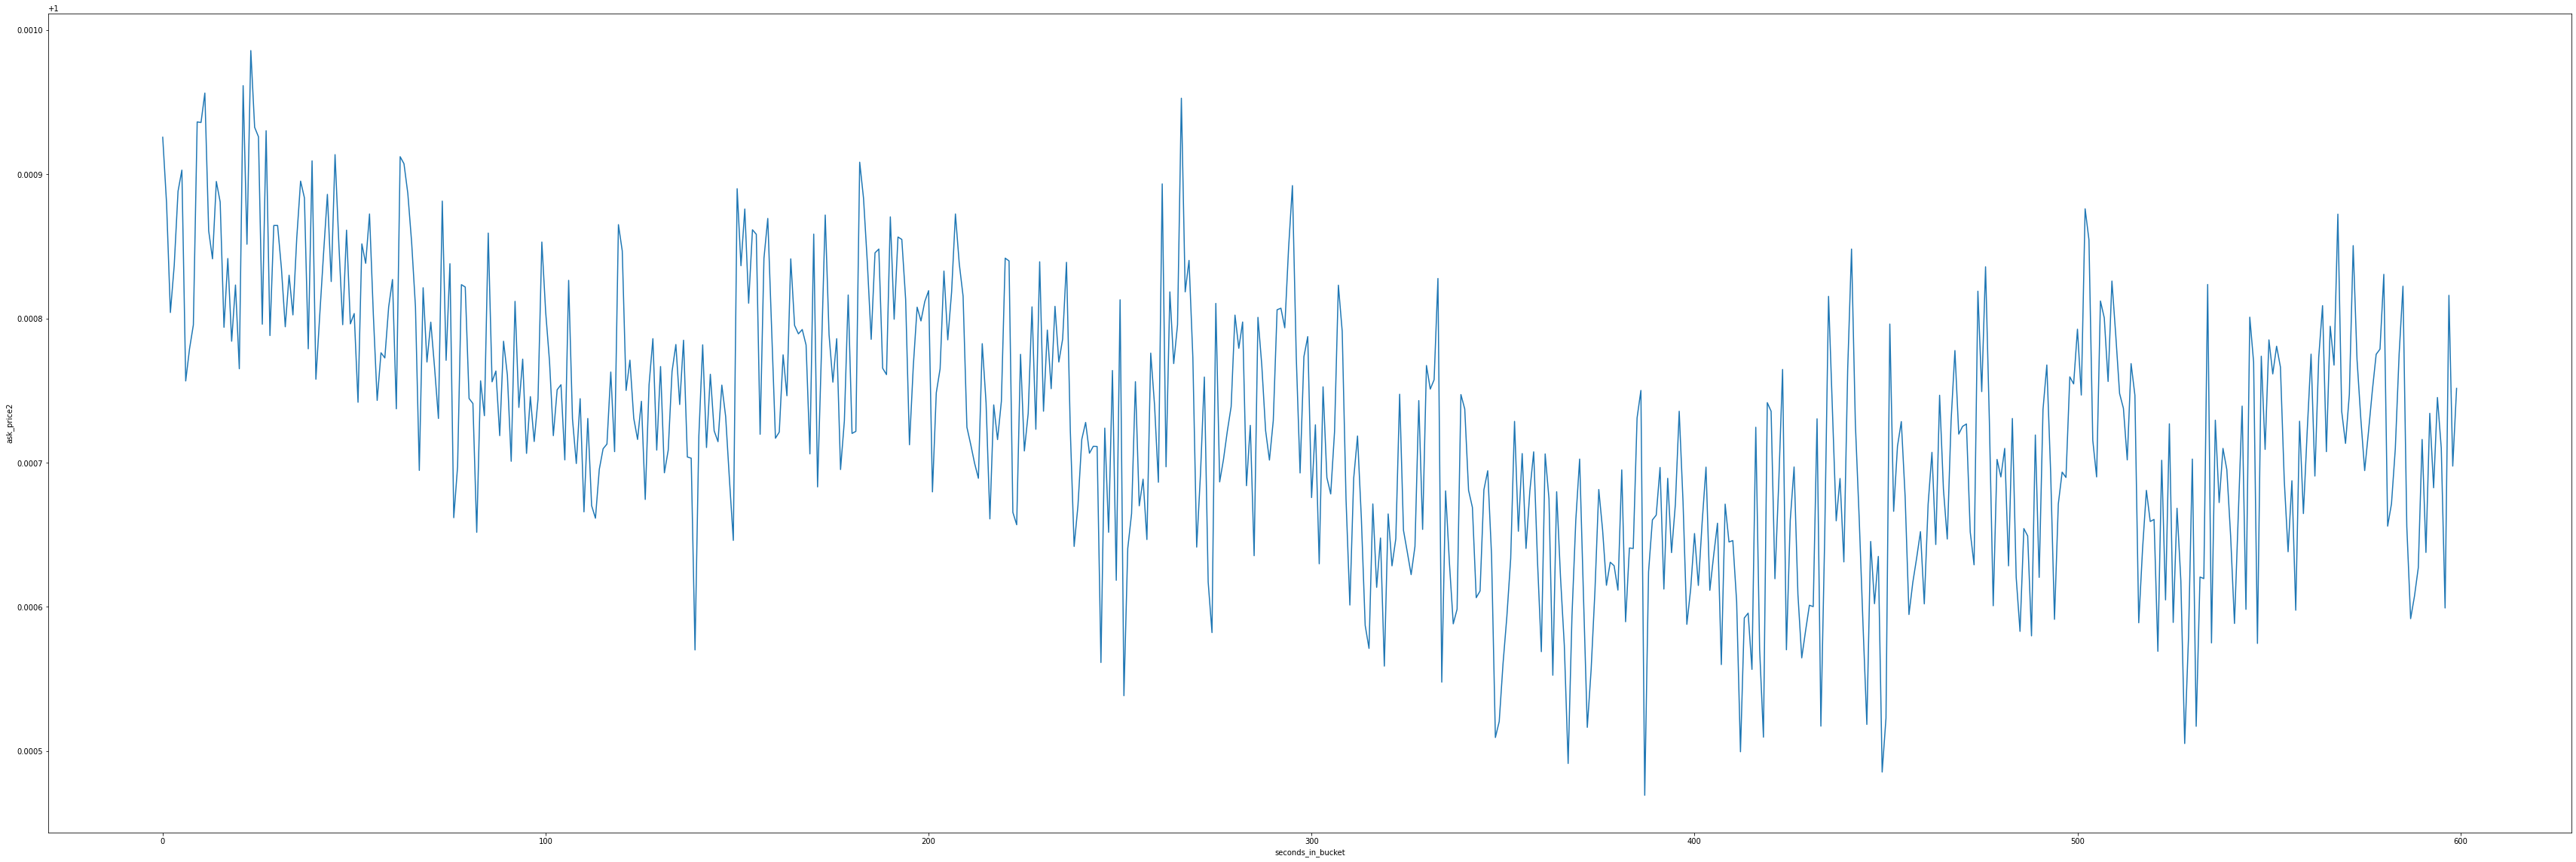

In [19]:
plt.figure(figsize=(60,20))
sns.lineplot(df_book['seconds_in_bucket'],df_book['ask_price2'],err_style=None)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-package

<AxesSubplot:xlabel='seconds_in_bucket', ylabel='bid_price1'>

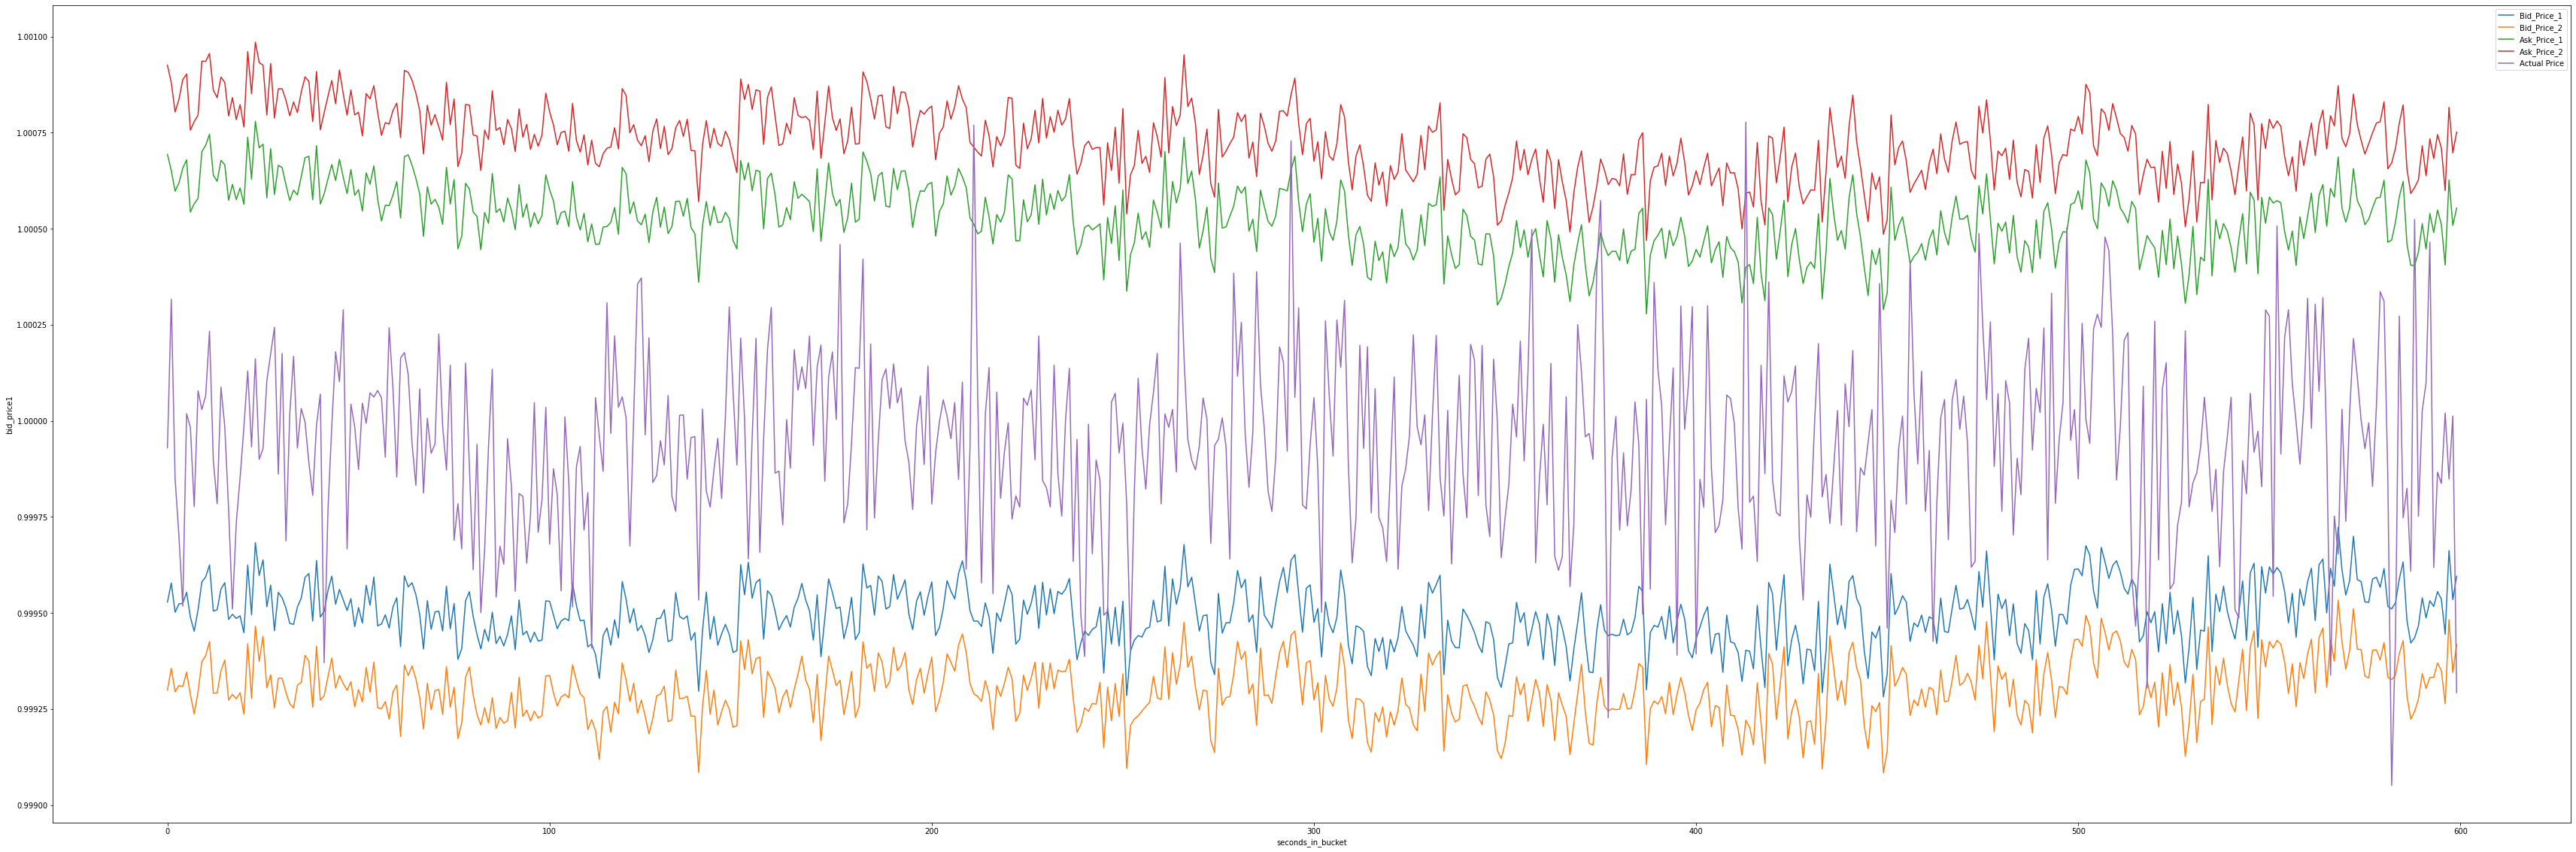

In [10]:
samples = ["bid_price1","bid_price2","ask_price1","ask_price2"]
label = ['Bid_Price_1','Bid_Price_2','Ask_Price_1','Ask_Price_2']
plt.figure(figsize=(60,20))

for a,b in zip(samples, label):
    sns.lineplot(df_book['seconds_in_bucket'],df_book[a],err_style=None,label=b)
sns.lineplot(df_trade['seconds_in_bucket'],df_trade["price"],err_style=None,label='Actual Price')

In [7]:
df_book_test = df_book[df_book["time_id"]==11]
df_book_test.head()

,time_id,seconds_in_bucket,bid_price1,ask_price1,bid_price2,ask_price2,bid_size1,ask_size1,bid_size2,ask_size2,stock_id
302,11,0,0.999473,1.000176,0.999423,1.000376,205,100,20,30,0
303,11,3,0.999473,1.000176,0.999423,1.000376,200,100,20,30,0
304,11,13,0.999473,1.000326,0.999423,1.000376,200,100,20,30,0
305,11,18,0.999473,1.000025,0.999423,1.000376,200,100,20,30,0
306,11,28,0.999473,1.000326,0.999423,1.000376,200,100,20,30,0


In [8]:
df_trade_test = df_trade[df_trade["time_id"]==11]
df_trade_test.head(5)

,time_id,seconds_in_bucket,price,size,order_count,stock_id
40,11,0,0.999824,2,2,0
41,11,18,0.999925,1,1,0
42,11,28,0.999925,1,1,0
43,11,64,0.999724,1,1,0
44,11,75,1.000025,110,2,0


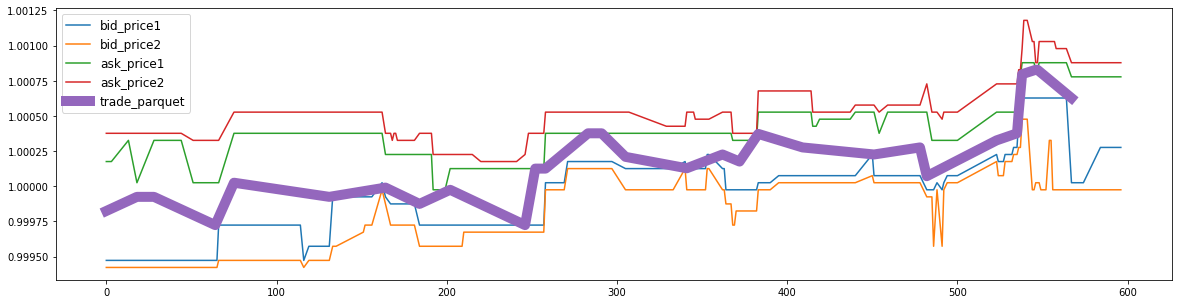

In [11]:
plt.figure(figsize=(20,5))

for num,a in enumerate(samples):
    
   
    plt.plot(df_book_test["seconds_in_bucket"],df_book_test[a],label=a)
    
plt.plot(df_trade_test["seconds_in_bucket"],df_trade_test["price"],label="trade_parquet",lw=10)
plt.legend(fontsize=12)

In [12]:
###############################
# Functions to add features
###############################

def add_wap(df, number=1, column_prefix='wap', standard=True):
    '''adding one wap

    number (int): the position of the price to take it could be 1 or 2
    standard (bool): use standard method to calculate wap or use a custom method
    '''
    if standard:
        df[column_prefix + str(number)] = (
            df['bid_price'+ str(number)] * df['ask_size'+ str(number)] + df['ask_price'+ str(number)] * df['bid_size'+ str(number)]) / (
                df['ask_size'+ str(number)]+ df['bid_size'+ str(number)])
    else:
        df[column_prefix + str(number) + '_ns'] = (
            df['bid_price'+ str(number)] * df['bid_size'+ str(number)] + df['ask_price'+ str(number)] * df['ask_size'+ str(number)]) / (
                df['ask_size'+ str(number)]+ df['bid_size'+ str(number)])

def log_return(list_stock_prices):
    return np.log(list_stock_prices).diff()

def realized_volatility(series_log_return):
    return np.sqrt(np.sum(series_log_return**2))

def add_waps(df):
        '''add many waps'''
        add_wap(df, 1, column_prefix='wap')
        add_wap(df, 2, column_prefix='wap')
        add_wap(df, 1, column_prefix='wap', standard=False)
        add_wap(df, 2, column_prefix='wap', standard=False)
        df['wap_p'] = ((
                df['wap1'] * (df['ask_size1'] + df['bid_size1']) +
                df['wap2'] * (df['ask_size2'] + df['bid_size2'])) /
                (df['ask_size1'] + df['bid_size1'] + df['ask_size2'] + df['bid_size2']))
        df['wap_balance'] = abs(df['wap1'] - df['wap2'])

def add_log_return(df, price_col, log_col_name, group='time_id'):
        df[log_col_name] = df.groupby([group])[price_col].apply(log_return)

def add_spreads(df):
        # # tests with ponderates features
        # df['bid_spread_p'] = (df['bid_price1'] * df['bid_size1'] - df['bid_price2'] * df['bid_size1'])/(df['bid_size1'] + df['bid_size2'])
        # df['ask_spread_p'] = (df['ask_price1'] * df['ask_size1'] - df['ask_price2'] * df['ask_size1'])/(df['ask_size1'] + df['ask_size2'])
        # df["bid_ask_spread_p"] = abs(df['bid_spread_p'] - df['ask_spread_p'])
        df['bid_spread'] = df['bid_price1'] - df['bid_price2']
        df['ask_spread'] = df['ask_price1'] - df['ask_price2']
        df['price_spread'] = (df['ask_price1'] - df['bid_price1']) / ((df['ask_price1'] + df['bid_price1'])/2)
        df["bid_ask_spread1"] = (df['ask_price1'] - df['bid_price1'])/df['bid_price1']
        df["bid_ask_spread2"] = (df['ask_price2'] - df['bid_price2'])/df['bid_price2']
        df["bid_ask_spread_p"] = ((df['ask_price1'] + df['ask_price2']) - (df['bid_price1'] + df['bid_price2']))/(df['bid_price1'] + df['bid_price2'])

def add_volumes(df):
        df['total_volume'] = (df['ask_size1'] + df['ask_size2']) + (df['bid_size1'] + df['bid_size2'])
        df['volume_imbalance'] = abs((df['ask_size1'] + df['ask_size2']) - (df['bid_size1'] + df['bid_size2']))

def add_EMA(df, wap_col, nb_period):
        df[wap_col + '_' + str(nb_period) + 'sec_EWM'] = df[wap_col].ewm(span=nb_period, adjust=False).mean()

###############################
# Evaluation
###############################
def rmspe(y_true, y_pred):
    return  (np.sqrt(np.mean(np.square((y_true - y_pred) / y_true))))

In [16]:
df_book_sample = df_book[(df_book['stock_id'] == 0) & (df_book['time_id'] < 35)].copy()

In [17]:
add_wap(df_book_sample)

In [20]:
fig = px.line(df_book_sample, x="seconds_in_bucket", y="wap1", title='WAP of stock_id_0, time_id <35', color='time_id')
fig.show()

In [21]:
df_book_sample['log_return'] = df_book_sample.groupby(['time_id'])['wap1'].apply(log_return)
df_book_sample = df_book_sample[~df_book_sample['log_return'].isnull()]

In [23]:
fig = px.line(df_book_sample, x="seconds_in_bucket", y="log_return", title='Log return of stock_id_0, time_id <35', color='time_id')
fig.show()

In [24]:
realized_vol = df_book_sample.groupby(['time_id'])['log_return'].agg(realized_volatility)
print('Realized volatility for stock_id 0 :')
for i in realized_vol.index:
    print(f'- time_id {i} is {round(realized_vol.loc[i], 7)}')

Realized volatility for stock_id 0 :
- time_id 5 is 0.0044994
- time_id 11 is 0.0012044
- time_id 16 is 0.0023685
- time_id 31 is 0.0025738


In [27]:
df_train = pd.read_csv("/kaggle/input/optiver-realized-volatility-prediction/train.csv")
df_train.head()

,stock_id,time_id,target
0,0,5,0.004136
1,0,11,0.001445
2,0,16,0.002168
3,0,31,0.002195
4,0,62,0.001747


In [28]:
df_train.shape

(428932, 3)

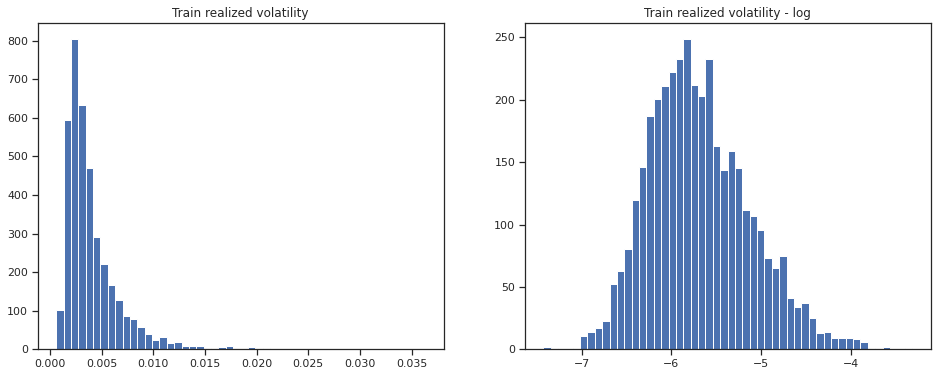

In [30]:
df_train_stock0 = df_train[df_train['stock_id'] == 0]

sns.set_theme(style="ticks")
fig = plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
plt.title("Train realized volatility")
plt.hist(df_train_stock0['target'], bins=50)

plt.subplot(1, 2, 2)
plt.title("Train realized volatility - log")
plt.hist(np.log(df_train_stock0['target']), bins=50)

plt.show()